# Grounding DINO
https://github.com/IDEA-Research/GroundingDINO

final text_encoder_type: bert-base-uncased


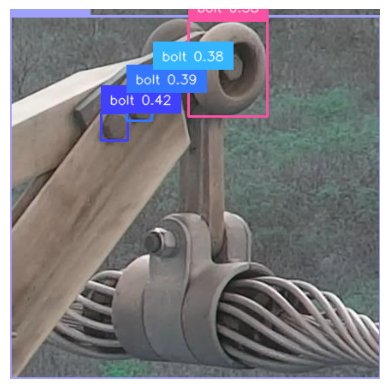

In [7]:
from groundingdino.util.inference import load_model, load_image, predict, annotate
import cv2
import matplotlib.pyplot as plt

model = load_model("GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py", "GroundingDINO/weights/groundingdino_swint_ogc.pth")
IMAGE_PATH = "data/InsPLAD-fault/defect_supervised/yoke-suspension/train/good/Fotos 01-12-2020_DJI_0019_amarra_balancim_336.jpg"
# TEXT_PROMPT = "chair . person . dog ."
# TEXT_PROMPT = "bolt . nut . washer . screw ."
TEXT_PROMPT = "bolt"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD,
    device="cpu",
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)
plt.imshow(annotated_frame)
plt.axis("off")
plt.show()
# cv2.imwrite("annotated_image.jpg", annotated_frame)